In [1]:
import numpy as np
import scipy
import scipy.signal as ss
import matplotlib.pyplot as plt
from scipy.linalg import svd, hankel, eig
from tqdm import trange

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
np.random.seed(999)

In [4]:
noise = 0.001
overlap = 0.2
Tmax = 1000
dt = 1

In [5]:
def generate_samples(E, psi0, dt=1, nb=100):
    S = np.zeros(nb, dtype=np.complex128)
    
    for j in trange(nb):
        S[j] = np.sum(np.abs(psi0)**2 * np.exp(-1j * E * j * dt))
    
    return S

In [6]:
def lam2lamt(lam, lammin, lammax):
    lamt = np.pi / 2 * (lam - (lammin + lammax) / 2) / (lammax - lammin)
    return lamt

In [7]:
def generate_phi(overlap, N):
    phi = np.zeros((N,1))
    phi[0] = np.sqrt(overlap)
    phi[1:] = np.sqrt((1 - phi[0]**2) / (N - 1))
    return phi

In [8]:
data_cr2 = scipy.io.loadmat('../../data/Cr2_4000.mat')
psiHF = data_cr2['psiHF']
E = data_cr2['E']

In [9]:
#Et = lam2lamt(E,E[0],E[-1])
#E_center = E - (E.min() + E.max())/2
#Et = E_center / np.abs(E_center).max()

In [10]:
phi = generate_phi(overlap,len(E))
print('generated phi')
dataS = generate_samples(E,phi,dt,Tmax)

generated phi


100%|██████████| 1000/1000 [00:00<00:00, 6843.37it/s]


Text(0.5, 1.0, 'True dynamics')

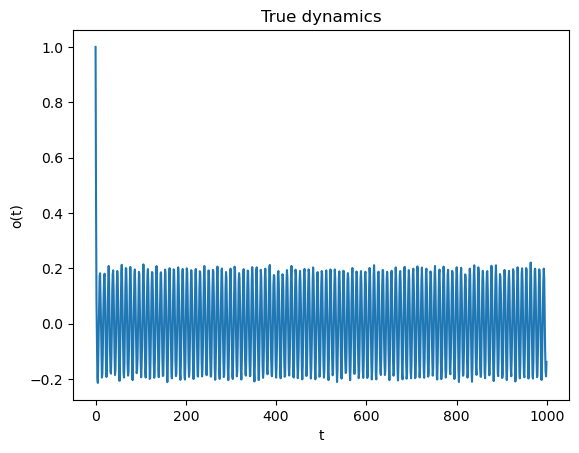

In [11]:
plt.plot(dataS.real)
plt.xlabel('t')
plt.ylabel('o(t)')
plt.title('True dynamics')

In [12]:
tdataS = dataS + noise * np.random.randn(Tmax) + 1j * noise * np.random.randn(Tmax)
tdataS = np.clip(tdataS, -1, 1)

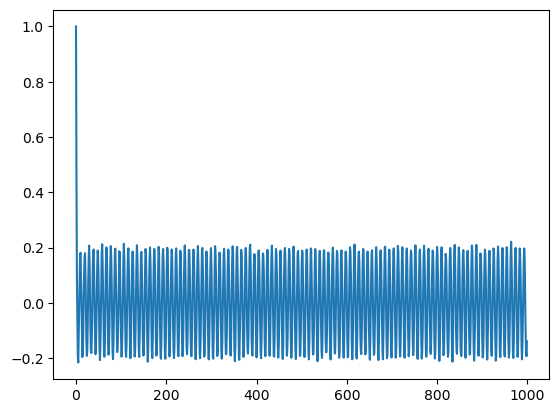

In [13]:
tdataS[0] = 1.0 + 0.0j
plt.plot(tdataS.real)

In [14]:
errors = []
true = E[0].item()
for i in trange(2, Tmax + 1):
    f, Pxx_den = ss.welch(tdataS.real[:i], 1, nperseg=None)
    pred = -f[np.argsort(Pxx_den)[-1]] * 2*np.pi
    abs_error = np.abs(pred - true)
    errors.append(np.max([1e-14, abs_error]))
    # plt.plot(f,Pxx_den)
    # plt.show()

100%|██████████| 999/999 [00:00<00:00, 6274.62it/s]


In [15]:
# plt.plot(f,Pxx_den)

Text(0, 0.5, 'abs error')

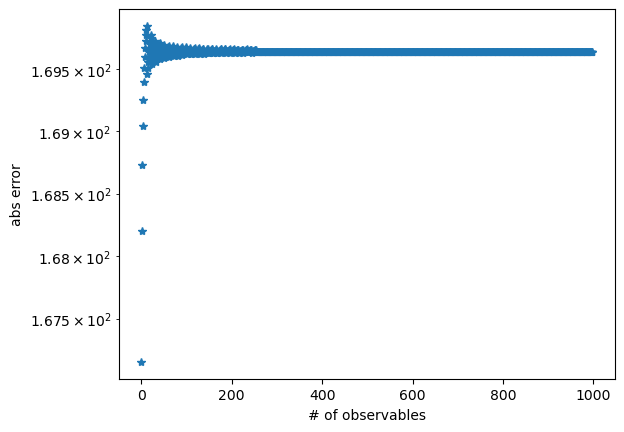

In [16]:
plt.semilogy(errors, '*')
plt.xlabel('# of observables')
plt.ylabel('abs error')

In [16]:
errors

[2.356194490192345,
 1.308996938995747,
 0.7853981633974483,
 0.47123889803846897,
 0.26179938779914935,
 0.1121997376282069,
 1e-14,
 0.08726646259971649,
 0.15707963267948966,
 2.0705951580478184,
 1.8325957145940457,
 2.114533516839284,
 1.9073955396795172,
 1.7278759594743862,
 1.9634954084936207,
 1.8017957866176753,
 1.658062789394613,
 1.8601535448886932,
 2.0420352248333655,
 0.1121997376282069,
 0.07139983303613162,
 0.03414774623467165,
 1e-14,
 0.031415926535897976,
 0.0604152433382652,
 0.08726646259971649,
 0.1121997376282069,
 0.08124808586870158,
 0.05235987755982985,
 0.025335424625724134,
 1e-14,
 0.023799944345377244,
 0.04619989196455576,
 0.06731984257692414,
 0.08726646259971649,
 0.0636809321673607,
 0.04133674544197097,
 0.020138414446088326,
 1e-14,
 0.019156052765791465,
 0.1121997376282069,
 0.09132536783691259,
 0.07139983303613162,
 0.05235987755982985,
 0.03414774623467165,
 0.0167105992212222,
 1e-14,
 0.1121997376282069,
 0.09424777960769393,
 0.076999819

In [17]:
pred = -f[np.argsort(Pxx_den)[-1]] * 2*np.pi

In [18]:
true = -np.pi/4

In [19]:
np.abs(pred - true)

0.0

In [20]:
Et[0].item() == true

True